In [5]:
## Decision tree (Regression) Hitters Case Study
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import mean_squared_error


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [9]:
Hitters = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/Hitters.csv",index_col=0)

In [3]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
Hitters.shape

(322, 20)

In [5]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [6]:
Hitters.index.name='Player'

In [7]:
Hitters = Hitters.dropna()

In [8]:
Hitters.shape

(263, 20)

In [9]:
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2de595e668>]],
      dtype=object)

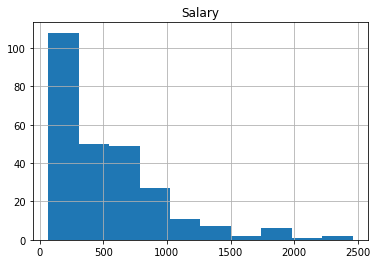

In [10]:
%matplotlib inline
Hitters.hist('Salary')

In [11]:
Hitters.Salary = np.log(Hitters.Salary)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2de4d936d8>]],
      dtype=object)

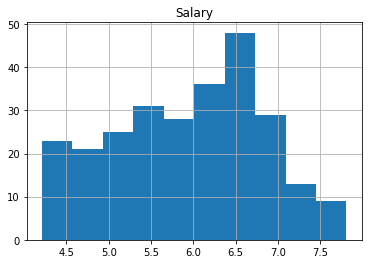

In [12]:
%matplotlib inline
Hitters.hist('Salary')

In [24]:
Hitters = pd.get_dummies(Hitters,columns=['League','Division','NewLeague'],drop_first=True)

In [14]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,0,1,0


In [10]:
X = Hitters.copy()

In [11]:
del X['Salary']

In [17]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [18]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [13]:
y=Hitters.Salary

In [23]:
X.shape,y.shape

((322, 19), (322,))

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((257, 19), (65, 19), (257,), (65,))

In [25]:
model1 = DecisionTreeRegressor(max_depth=4)

In [26]:
model1.fit(X_train,y_train)

ValueError: could not convert string to float: 'A'

In [25]:
export_graphviz(model1,out_file='Regtree.dot',feature_names=X_train.columns)

In [26]:
!dot -Tpng Regtree.dot -o Regtree.png

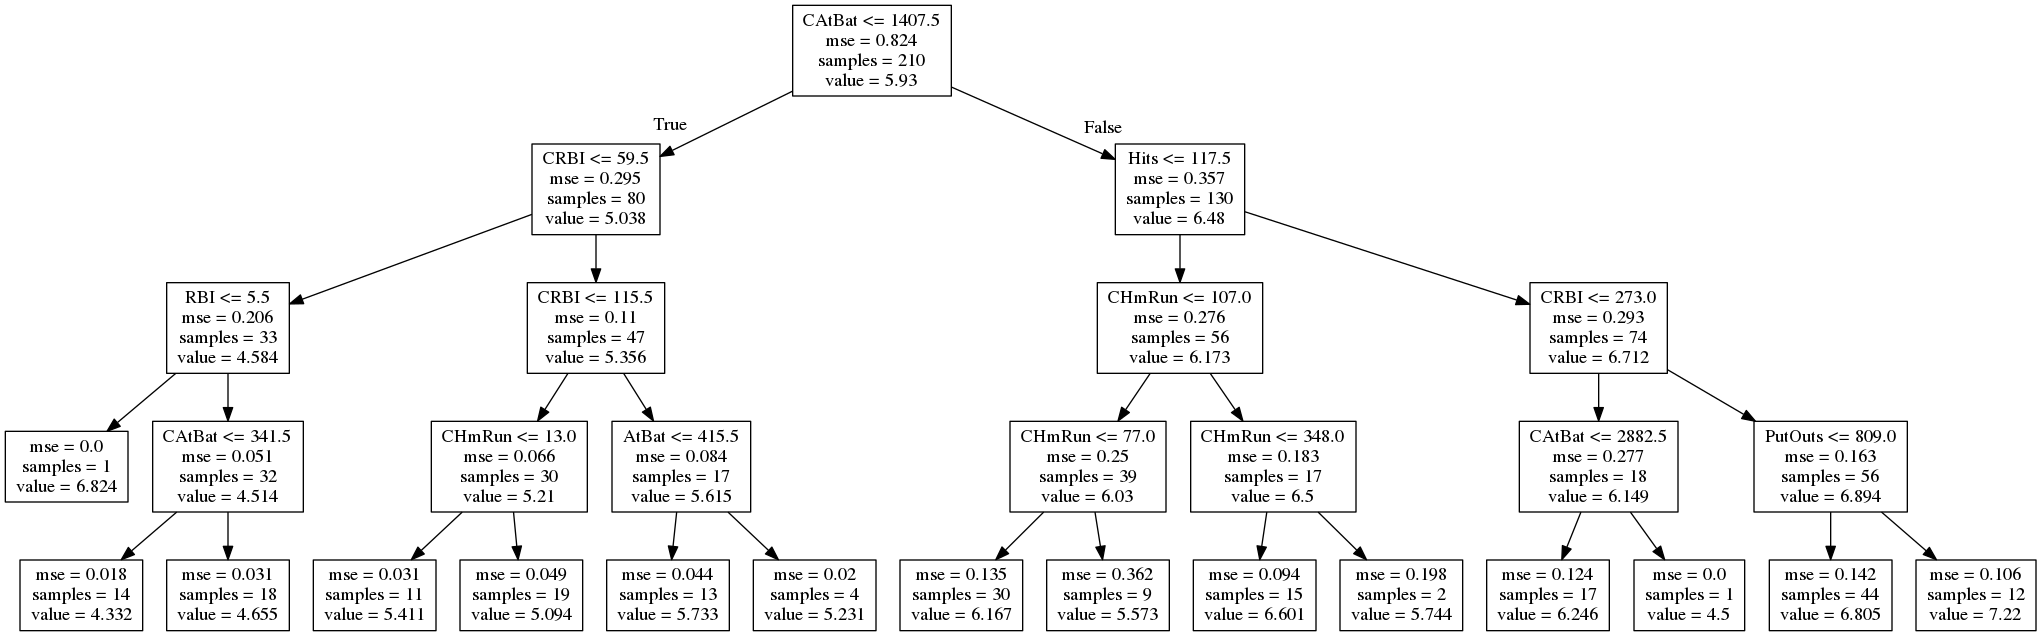

In [27]:
Image("Regtree.png")

In [28]:
model2 = DecisionTreeRegressor(max_depth=2)

In [29]:
model2.fit(X_train[['Years','Hits']],y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
export_graphviz(model2,out_file='Regtree1.dot',feature_names=X_train[['Years','Hits']].columns)

In [31]:
!dot -Tpng Regtree1.dot -o Regtree1.png

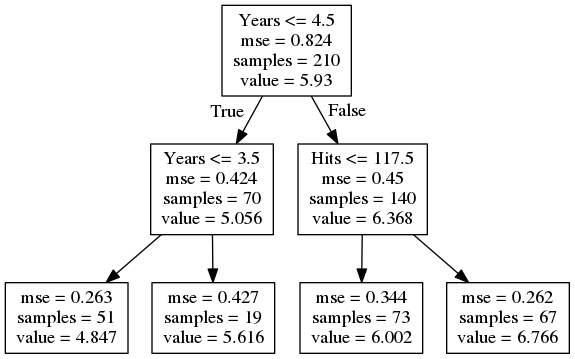

In [32]:
Image("Regtree1.png")

In [33]:
model1.score(X_train,y_train)

0.8759289524311671

In [34]:
y_pred_test = model1.predict(X_test)

In [35]:
SSE_m1 = np.sum((y_pred_test-y_test)**2)
SSE_m1

12.308109776543265

In [36]:
SST_m1

NameError: name 'SST_m1' is not defined

In [40]:
model3 = DecisionTreeRegressor(min_samples_leaf=5)

In [41]:
model3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
model3.score(X_train,y_train)

0.8903434219802548

In [43]:
export_graphviz(model3,out_file='tree.dot',feature_names=X_train.columns)

In [44]:
!dot -Tpng tree.dot -o tree.png

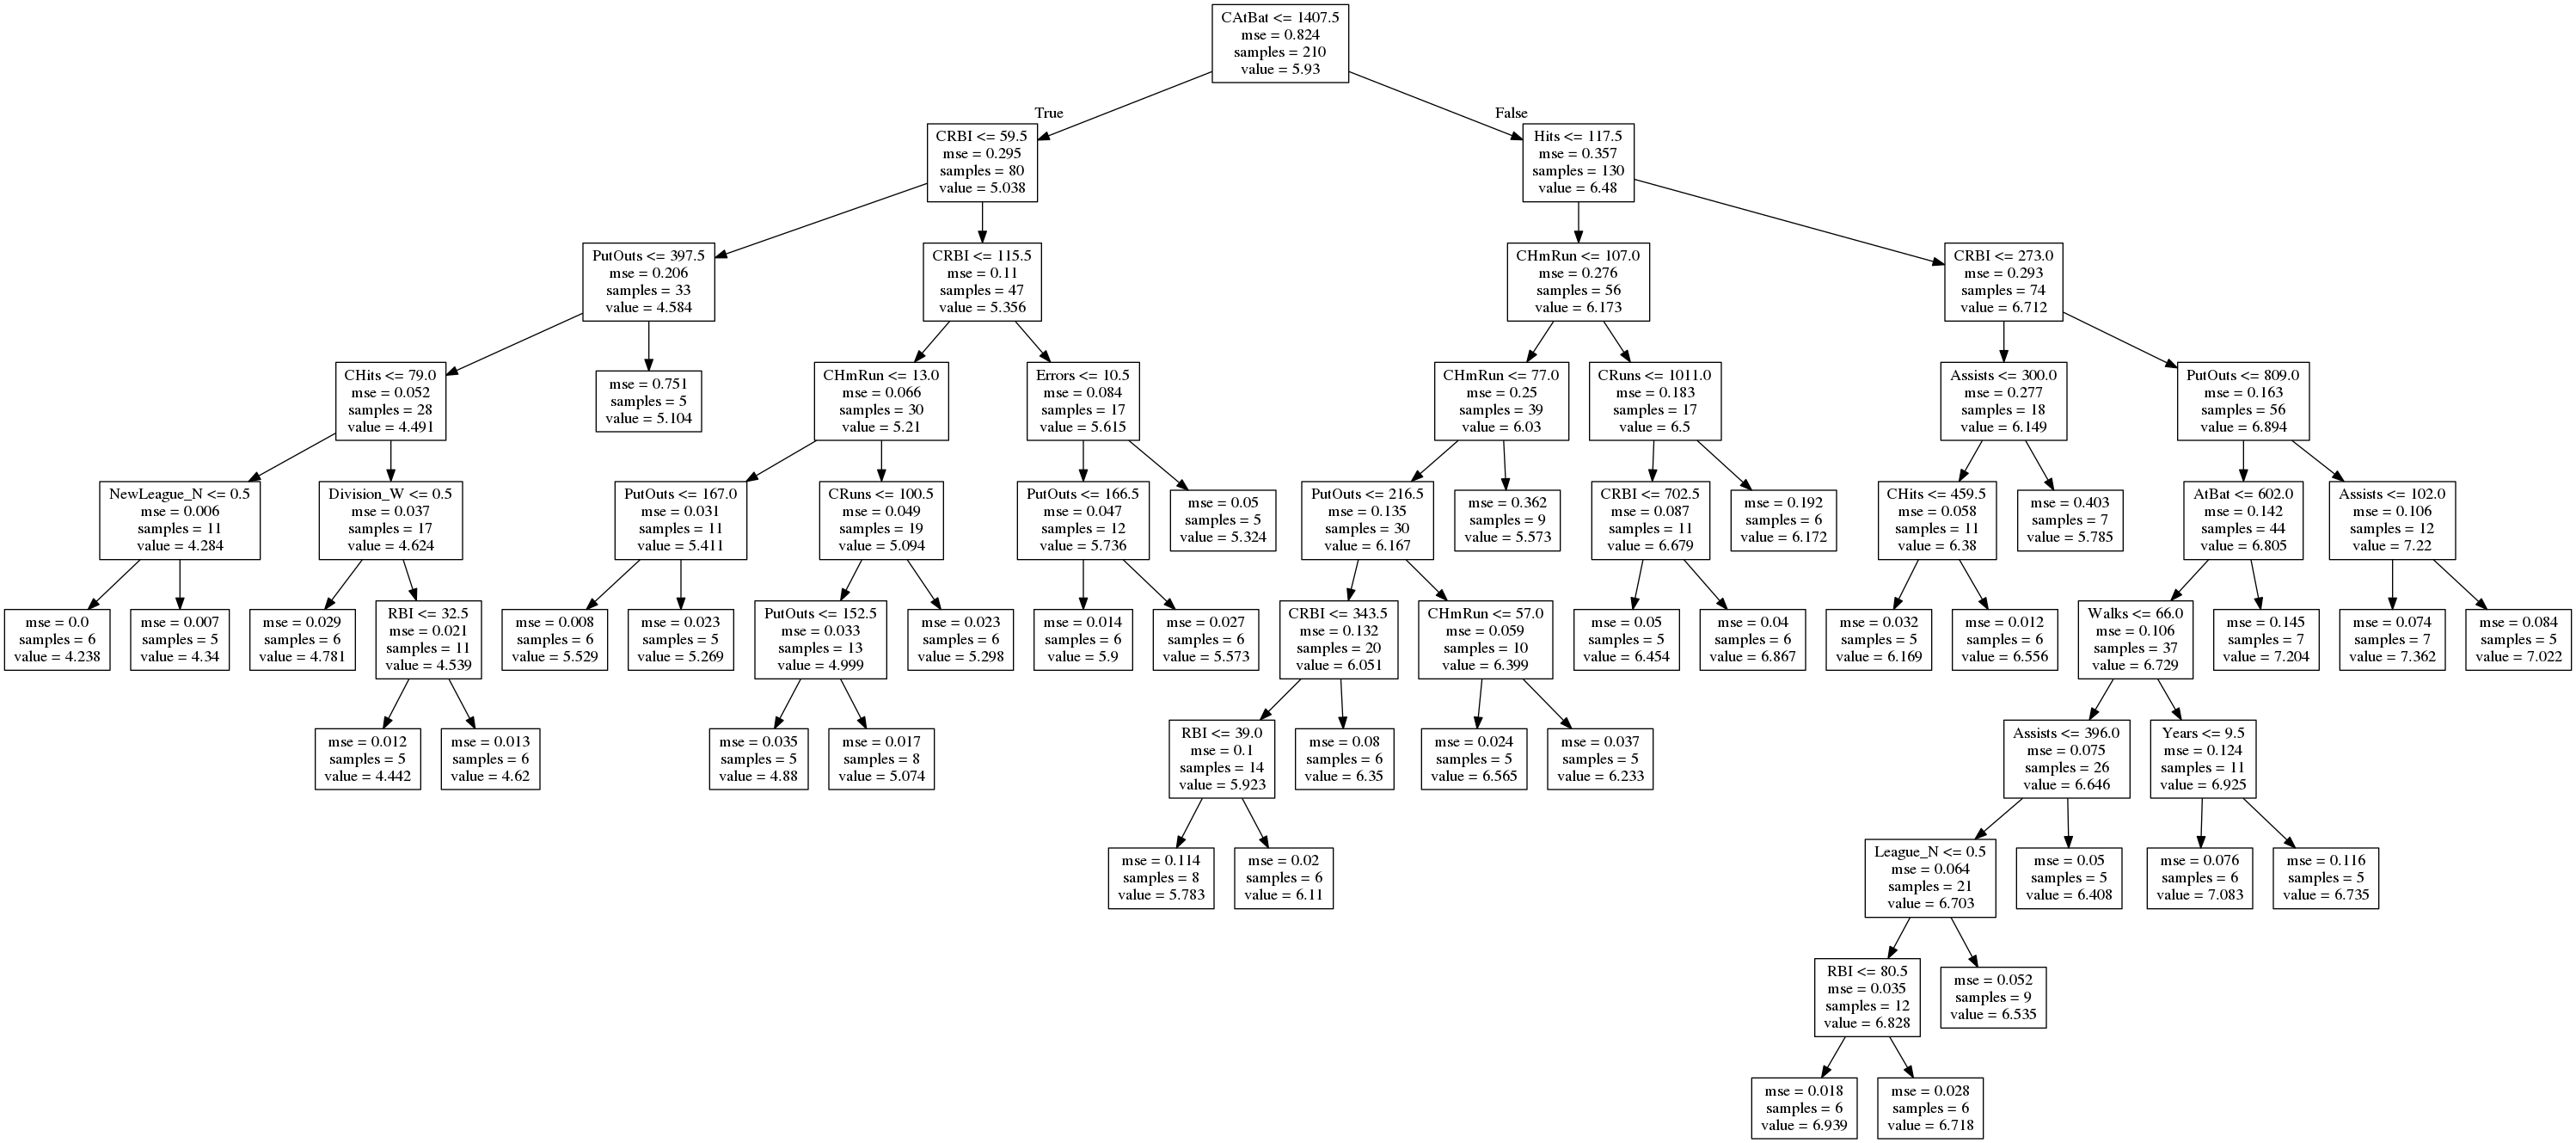

In [45]:
Image("tree.png")

In [46]:
y_pred_model3 = model3.predict(X_test)
SSE_m1 = np.sum((y_pred_model3-y_test)**2)
print(SSE_m1)
SST_m1 = np.sum((y_test-np.mean(y_train))**2)
print(SST_m1)
r2_m1 = 1-SSE_m1/SST_m1
r2_m1

25.584242896407314
34.138208462647825


0.25056867221371015

In [48]:
model4 = DecisionTreeRegressor(min_samples_leaf=25)
model4.fit(X_train,y_train)
model4.score(X_train,y_train)
export_graphviz(model4,out_file='tree1.dot',feature_names=X_train.columns)
!dot -Tpng tree1.dot -o tree1.png
#Image("tree1.png")

In [50]:
model4.score(X_train,y_train)

0.7679127393406748

In [49]:
y_pred_model4 = model4.predict(X_test)
SSE_m1 = np.sum((y_pred_model4-y_test)**2)
print(SSE_m1)
SST_m1 = np.sum((y_test-np.mean(y_train))**2)
print(SST_m1)
r2_m1 = 1-SSE_m1/SST_m1
r2_m1

21.954884970426292
34.138208462647825


0.35688233334071595

In [1]:
parameters = {'max_depth':[1,2,3,4,5,6]}

In [6]:
grid = GridSearchCV(model_all,parameters,cv=10,scoring='r2')

NameError: name 'model_all' is not defined

In [19]:
model_prune = DecisionTreeRegressor(max_depth=3)

In [20]:
model_prune.fit(X_train,y_train)

ValueError: could not convert string to float: 'A'